In [ ]:
import os
import shutil
import random
import re
import pandas as pd
import matplotlib.pyplot as plt

### Definimos los directorios padres de cada set y el % de imagenes que le corresponde a cada uno.

In [ ]:
# Set the paths for the original and new directories
original_dir = '/content/drive/MyDrive/PracticaImagenes/garbage_classification'
train_dir = '/content/drive/MyDrive/PracticaImagenes/garbage_classification/train'
test_dir = '/content/drive/MyDrive/PracticaImagenes/garbage_classification/test'
val_dir = '/content/drive/MyDrive/PracticaImagenes/garbage_classification/validation'

# Set the percentage split for train, test, and validation data
train_split = 0.7
test_split = 0.2
val_split = 0.1

In [ ]:
categories = [dir for dir in os.listdir(original_dir) if dir not in ["train", "test", "validation"]]

# Loop through each category directory in the original directory
for category in categories:
    category_path = os.path.join(original_dir, category)

    for directory in [train_dir, test_dir, val_dir]:
      new_category_path = os.path.join(directory, category)
      if not os.path.exists(new_category_path):
            os.makedirs(new_category_path)

    # Get a list of all the image files in the category directory
    image_files = [os.path.join(category_path, filename) for filename in os.listdir(category_path) if filename.endswith('.jpg')]

    # Randomly shuffle the image files
    random.shuffle(image_files)

    # Split the image files into train, test, and validation sets
    num_images = len(image_files)
    train_end = int(num_images * train_split)
    test_end = train_end + int(num_images * test_split)
    train_files = image_files[:train_end]
    test_files = image_files[train_end:test_end]
    val_files = image_files[test_end:]
    
    # Copy the image files to the new directories
    for file in train_files:
        shutil.copy(file, os.path.join(train_dir, category))
    for file in test_files:
        shutil.copy(file, os.path.join(test_dir, category))
    for file in val_files:
        shutil.copy(file, os.path.join(val_dir, category))

In [ ]:
# Dictionary to save our 12 classes
categories = {0: 'paper', 1: 'cardboard', 2: 'plastic', 3: 'metal', 4: 'trash', 5: 'battery',
              6: 'shoes', 7: 'clothes', 8: 'green-glass', 9: 'brown-glass', 10: 'white-glass',
              11: 'biological'}

In [ ]:
categories

{0: 'paper',
 1: 'cardboard',
 2: 'plastic',
 3: 'metal',
 4: 'trash',
 5: 'battery',
 6: 'shoes',
 7: 'clothes',
 8: 'green-glass',
 9: 'brown-glass',
 10: 'white-glass',
 11: 'biological'}

In [ ]:
# Add class name prefix to filename. So for example "/paper104.jpg" become "paper/paper104.jpg"
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

In [ ]:
def imagepaths_df(directory):
  # list conatining all the filenames in the dataset
  filenames_list = []
  # list to store the corresponding category, note that each folder of the dataset has one class of data
  categories_list = []

  for category in categories:
      filenames = os.listdir(directory + "/" + categories[category])
      
      filenames_list = filenames_list  +filenames
      categories_list = categories_list + [category] * len(filenames)
      
  df = pd.DataFrame({
      'filename': filenames_list,
      'category': categories_list
  })

  df = add_class_name_prefix(df, 'filename')
  # Shuffle the dataframe
  df = df.sample(frac=1).reset_index(drop=True)
  print('number of elements = ' , len(df))
  return(df)

In [ ]:
def viz_class_distribution(df):
  df_visualization = df.copy()
  # Change the catgegories from numbers to names
  df_visualization['category'] = df_visualization['category'].apply(lambda x:categories[x] )

  df_visualization['category'].value_counts().plot.bar(x = 'count', y = 'category' )

  plt.xlabel("Garbage Classes", labelpad=14)
  plt.ylabel("Images Count", labelpad=14)
  plt.title("Count of images per class", y=1.02)

In [ ]:
print("TRAIN ")
df_train = imagepaths_df(train_dir)
print("TEST ")
df_test = imagepaths_df(test_dir)
print("VALIDATION ")
df_val = imagepaths_df(val_dir)

TRAIN 
number of elements =  10866
TEST 
number of elements =  3103
VALIDATION 
number of elements =  1563


### Visualizacion de las distribuciones de cada clase para train test y validacion

distribution class for train


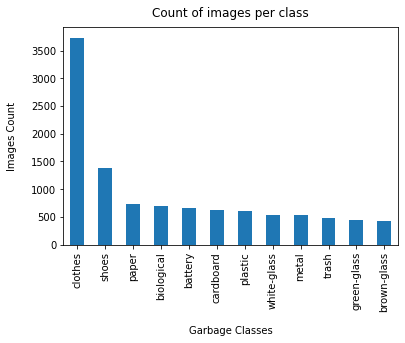

In [ ]:
print("distribution class for train")
viz_class_distribution(df_train)

distribution class for test


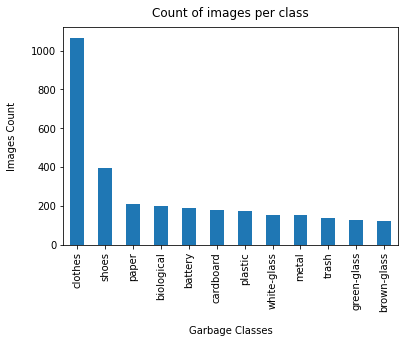

In [ ]:
print("distribution class for test")
viz_class_distribution(df_test)

distribution class for validation


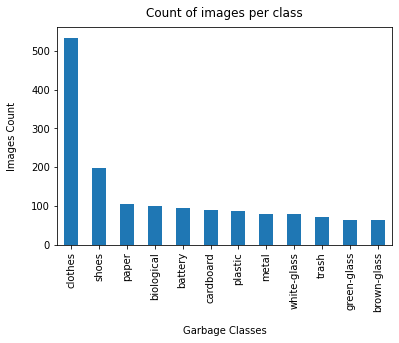

In [ ]:
print("distribution class for validation")
viz_class_distribution(df_val)